# Narrative

The purpose of this project is to figure out how the change in radius of a ball/puck in a plinko machine would effect the time it takes for the ball/puck to reach the bottom of the machine. For those who dont know what a Plinko machine is; a Plinko machine is a vertical board that has spikes alternating each row. The puck for the Plinko machine will fall down into the machine and then collide with the spikes, moving the puck around until it reaches the bottom. To simulate the puck falling into the machine and then colliding with the spike I would need to use multiple rules.These rules or equations will allow the puck to have physiscs instead of fasing through the machine. The physics equations that will be used are:

1.) The position update equation:
    $ r_f = r_i + vavg * dt$
    
2.) The momentum principle:
    $ \frac{\Delta p}{\Delta t} = Fnet$
    
    
3.) The velocity update equation:
    $ v_f = v_i + \frac{Fnet}{m} * dt$
    
4.) The energy principle:
    $e_f = e_i   or E = W + Q  $
    
## Setting up wall collisions

To be able to have the puck stay inside the machine I first had to create the borders of the machine. After setting up the shell of the machine I then added the puck(which will be a sphere). I have the puck set to the top-middle of the machine. To add the physics I had to apply the velocity update equation and the momentum principle.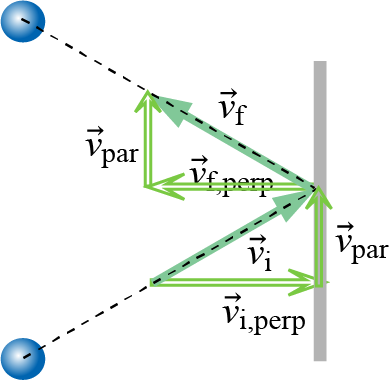 


## Setting up spike collisions

Unlike the wall collisions, the spike collsions proved to be more difficult. For the spike collisions I had to make a list of spikes that would alternate in position for each row. This prevents the ball from having a straight shot to the bottom of the machine. For applying physics I had to have the ball go through the row, col elements of the list of spikes and then check to see if the ball collided with them. If it did then I will find the tangent of the balls velocity and the balls radius. I then inversed the radius so that the ball bounce off the spike and then continue to fall down the machine. 

## Collecting data

The way the experiment will work is that it will go through the plinko plinko machine until the ball hits the bottom of the machine. Once the ball hits the bottom of the machine it will then record the time it took for the ball to go through the machine and then restart the ball in its original position. This will go on for 10 iterations. After the iterations are over the the radius will then increase and the experiment will start over. 
The way the data will be stored and presented is by the use of histograms. Histograms allow it user to collect data from an array and put it inside of a bin. A bin for a histogram is similar to an index in an array. So each element of the histogram will have a set value from a list provided by a user. 

## The results 

Comparing the original histogram to the radius modified one shows that as the radius increases for the ball. It will take longer for the ball to reach the bottom of the machine. When it came to changing the radius I did not want to have a drastic change. Going from 1.5 to 17 would be too much of a change and also might not fit between the position of the spikes. That is why I decided to have the radius equaled to itself times two-thirds. 

    

In [1]:
from vpython import *
import numpy as np
import random as rand
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [ ]:
scene=canvas()
scene.width=1000
scene.height=700
l = 200
thickness = 5
mass = 5 #kg
gravity = vec(0,-9.8,0)
counter = 90
t = 0



R = 1.5 # temporary
lwall = box(pos = vec(-100,0,0), size = vec(thickness,l,10), color = color.green)
rwall = box(pos = vec(100,0,0), size = vec(thickness,l,10), color = color.green)
zwall = box(pos = vec(0,0,-5), size = vec(l,l,thickness), color = color.green)
bwall = box(pos = vec(0,-100,0), size = vec(l,thickness,10), color = color.blue)

ball = sphere(pos = vec(5.5,110,0), radius = R, color = color.white)
ball.v = vec(0,0,0)
ball.p = vec(0,0,0)

spike_list = [] # Stores the spikes in order.
for i in range(0,95,5):
    for j in range(0,190,10):
        if i % 2 == 0:
            spike = cylinder(pos = vec(-90 + j,counter - (2*i),-5), axis = vec(0,0,10), radius = 1, color = color.cyan, collided = False)
            spike_list.append(spike)
        elif i % 2!= 0:
            spike = cylinder(pos = vec(-90 + j + 5,counter - (2*i),-5), axis = vec(0,0,10), radius = 1, color = color.cyan, collided = False)
            spike_list.append(spike)
dt = 0.01
            
scene.pause()

# This allows the while loop to contain the original values of the ball so each iteration start out the same.
origon_pos = vec(5.5,110,0)
origon_v = vec(0,0,0)
increment = 0

tlist = []
trial_list= []
if increment < 10:
    for i in range(10):
        ball.pos = origon_pos
        ball.v = origon_v
        while ball.pos.y > bwall.pos.y:
            rate(1000)    # resets values of ball and velocity back to origonal values
            #ball.pos = origon_pos
            #ball.v = origon_v
    
            ball.v = ball.v + gravity* dt
            ball.pos = ball.pos + ball.v*dt
            for b in range(len(spike_list)):
        
                center = spike_list[b].pos + spike_list[b].axis/2
                r = ball.pos - center
                #wall Collision
                if ball.pos.x > 100:
                    ball.v.x = -abs(ball.v.x)
                elif ball.v.x < -100:
                    ball.v.x = abs(ball.v.x)
            # spike collision
                if mag(r) < spike_list[i].radius+R and spike_list[b].collided == False:
                    rhat = hat(r)
                    vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
                    vballtan = ball.v - vballrad #tan comp of ball.v
                    vballrad = - vballrad #reverse ball.rad due to collision
                    ball.v = vballtan + vballrad #new ball.v after collision
                    ball.v = 0.3*ball.v
                    spike_list[b].collided = True
                elif mag(r) > spike_list[i].radius+R and spike_list[b].collided == True:
                    spike_list[b].collided = False
            
            t = t + dt
            tlist.append(t)
            trial_list.append(increment)
        
        increment = increment + 1
        
hist, bin_edges = np.histogram(tlist, bins=trial_list)
deltav = 100 # binning for v histogram
nbins = int(6000/deltav) #number of bins
bin_edges = [int(j*deltav) for j in range(nbins)] #left side of bins
counts, binx = np.histogram([t for a in tlist], bins=bin_edges)
for b in range(len(binx)-1):
    tmiddle = (binx[b] + binx[b+1])/2 #calculate speed at center of bin
    centers.append(tmiddle)

plt.figure(figsize=(12,8))
plt.bar(centers, counts, align='center', width=trial_list)
plt.title('Histogram of Times')
plt.show()


    
        
            

In [ ]:
# R increaded by R * 3 /2
scene=canvas()
scene.width=1000
scene.height=700
l = 200
thickness = 5
mass = 5 #kg
gravity = vec(0,-9.8,0)
counter = 90
t = 0



R = 1.5 # temporary
lwall = box(pos = vec(-100,0,0), size = vec(thickness,l,10), color = color.green)
rwall = box(pos = vec(100,0,0), size = vec(thickness,l,10), color = color.green)
zwall = box(pos = vec(0,0,-5), size = vec(l,l,thickness), color = color.green)
bwall = box(pos = vec(0,-100,0), size = vec(l,thickness,10), color = color.blue)

ball = sphere(pos = vec(5.5,110,0), radius = R , color = color.white)
ball.v = vec(0,0,0)
ball.p = vec(0,0,0)

spike_list = [] # Stores the spikes in order.
for i in range(0,95,5):
    for j in range(0,190,10):
        if i % 2 == 0:
            spike = cylinder(pos = vec(-90 + j,counter - (2*i),-5), axis = vec(0,0,10), radius = 1, color = color.cyan, collided = False)
            spike_list.append(spike)
        elif i % 2!= 0:
            spike = cylinder(pos = vec(-90 + j + 5,counter - (2*i),-5), axis = vec(0,0,10), radius = 1, color = color.cyan, collided = False)
            spike_list.append(spike)
dt = 0.01
            
scene.pause()

# This allows the while loop to contain the original values of the ball so each iteration start out the same.
origon_pos = vec(5.5,110,0)
origon_v = vec(0,0,0)
increment = 0

tlist = []
trial_list= []
if increment < 10:
    for i in range(10):
        ball.radius = R + R * 2 / 3
        ball.pos = origon_pos
        ball.v = origon_v
        while ball.pos.y > bwall.pos.y:
            rate(1000)    # resets values of ball and velocity back to origonal values
            #ball.pos = origon_pos
            #ball.v = origon_v
    
            ball.v = ball.v + gravity* dt
            ball.pos = ball.pos + ball.v*dt
            for b in range(len(spike_list)):
        
                center = spike_list[b].pos + spike_list[b].axis/2
                r = ball.pos - center
                #wall Collision
                if ball.pos.x > 100:
                    ball.v.x = -abs(ball.v.x)
                elif ball.v.x < -100:
                    ball.v.x = abs(ball.v.x)
            # spike collision
                if mag(r) < spike_list[i].radius+R and spike_list[b].collided == False:
                    rhat = hat(r)
                    vballrad = dot(ball.v,rhat)*rhat #rad comp of ball.v
                    vballtan = ball.v - vballrad #tan comp of ball.v
                    vballrad = - vballrad #reverse ball.rad due to collision
                    ball.v = vballtan + vballrad #new ball.v after collision
                    ball.v = 0.3*ball.v
                    spike_list[b].collided = True
                elif mag(r) > spike_list[i].radius+R and spike_list[b].collided == True:
                    spike_list[b].collided = False
            
            t = t + dt
            tlist.append(t)
            trial_list.append(increment)
        
        increment = increment + 1
        
hist, bin_edges = np.histogram(tlist, bins=trial_list
deltav = 100 # binning for v histogram
nbins = int(6000/deltav) #number of bins
bin_edges = [int(j*deltav) for j in range(nbins)] #left side of bins
counts, binx = np.histogram([t for a in tlist], bins=bin_edges)
for b in range(len(binx)-1):
    tmiddle = (binx[b] + binx[b+1])/2 #calculate speed at center of bin
    centers.append(tmiddle)

plt.figure(figsize=(12,8))
plt.bar(centers, counts, align='center', width=trial_list)
plt.title('Histogram of Times with Modified R')
plt.show()


    
        
            

# Sources

All images and knowledge of physics was provided by Dr. Titus

Information on histograms was provided by Dr. Titus and this youtube video: [click this link](https://www.youtube.com/watch?v=y47d2WY5U3c)